# Task 2

This is the task 2 portion of my D214 Course for the WGU MS Data Analytics Masters Degree.

## Research Question

> Summarize the original real-data research question you identified in task 1. Your summary should include justification for the research question you identified in task 1, a description of the context in which the research question exists, and a discussion of your hypothesis.

Do songs that are released after Spotify comes out have a statistically significantly shorter average length than songs that came out before Spotify (2008)? 

This question would benefit from data analysis because it gives us insight into both a cultural aspect of modern society in the seemingly widespread shortening of consumed entertainment and a guideline for musicians. It gives a measure for where the music industry could possibly be going and whether there are outliers that are able to make longer music, or if statistically it is necessary to stay within the bounds of certain song timeframes. 

My hypothesis for this research question is that released music has become statistically significantly shorter since after Spotify’s release.


## Data Collection

> B.  Report on your data-collection process by describing the relevant data you collected, discussing one advantage and one disadvantage of the data-gathering methodology you used, and discussing how you overcame any challenges you encountered during the process of collecting your data.



For data collection, I will be using a dataset from Kaggle that has 1.3 million songs with metadata related to answering the hypothesis of this question.

## Data Extraction and Preparation



> C.  Describe your data-extraction and -preparation process and provide screenshots to illustrate each step. Explain the tools and techniques you used for data extraction and data preparation, including how these tools and techniques were used on the data. Justify why you used these particular tools and techniques, including one advantage and one disadvantage when they are used with your data-extraction and -preparation methods. 



My data extraction and preparation process involves importing the track metadata.

The libraries I use are:
- Pandas: Used for dataframe manipulation
- matplotlib: Used for visualization

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('tracks_features.csv')

In [4]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

A lot of this data is not relevant for the analysis, so I will only keep important metadata and release dates.

In [6]:
df = df[['name','album','artists','duration_ms','year','release_date']]

In [7]:
df

,name,album,artists,duration_ms,year,release_date
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],210133,1999,1999-11-02
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],206200,1999,1999-11-02
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],298893,1999,1999-11-02
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],213640,1999,1999-11-02
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],205600,1999,1999-11-02
...,...,...,...,...,...,...
1204020,Gospel of Juke,Notch - EP,['FVLCRVM'],276213,2014,2014-01-09
1204021,Prism Visions,Notch - EP,['FVLCRVM'],363179,2014,2014-01-09
1204022,Tokyo 360,Notch - EP,['FVLCRVM'],385335,2014,2014-01-09
1204023,Yummy!,Notch - EP,['FVLCRVM'],324455,2014,2014-01-09


### Data Cleaning

#### Treating Nulls and Old Songs With Wrong Release Dates

First I want to start by getting some useful stats about the data. We can see there a few songs without release dates so I will drop those

In [8]:
df.loc[df['year'] == 0]

,name,album,artists,duration_ms,year,release_date
815351,Jimmy Neutron,Optimism 2,['iCizzle'],183000,0,0000
815352,I Luv You,Optimism 2,['iCizzle'],145161,0,0000
815353,My Heart,Optimism 2,['iCizzle'],176561,0,0000
815354,I Am (Invincible),Optimism 2,['iCizzle'],192000,0,0000
815355,Flower Power,Optimism 2,['iCizzle'],138666,0,0000
815356,Heard It Low,Optimism 2,['iCizzle'],138667,0,0000
815357,Hangin On,Optimism 2,['iCizzle'],142620,0,0000
815358,God Loves You,Optimism 2,['iCizzle'],161000,0,0000
815359,You In My Life,Optimism 2,['iCizzle'],214867,0,0000
815360,I Wonder,Optimism 2,['iCizzle'],180822,0,0000


In [9]:
df = df.loc[df['year'] != 0]

Then we will look into the oldest songs in the dataset

In [10]:
# This gives us the oldest released song in the dataset
df['year'].min()

1900

Out of curiousity I will look at some info related to the songs released in 1900.

Appears they are mostly from Rabih Abou-Khalil. The issue is that the songs here were released in 1996. I will drop these songs since they are not correct

In [11]:
df.loc[df['year'] == 1900]

,name,album,artists,duration_ms,year,release_date
450071,Arabian Waltz,Arabian Waltz,['Rabih Abou-Khalil'],493867,1900,1900-01-01
450072,Dreams Of A Dying City,Arabian Waltz,['Rabih Abou-Khalil'],730667,1900,1900-01-01
450073,Ornette Never Sleeps,Arabian Waltz,['Rabih Abou-Khalil'],421760,1900,1900-01-01
450074,Georgina,Arabian Waltz,['Rabih Abou-Khalil'],672707,1900,1900-01-01
450075,No Visa,Arabian Waltz,['Rabih Abou-Khalil'],601027,1900,1900-01-01
450076,The Pain After,Arabian Waltz,['Rabih Abou-Khalil'],566840,1900,1900-01-01
459980,Catania,Al-Jadida,['Rabih Abou-Khalil'],465000,1900,1900-01-01
459981,Nashwa,Al-Jadida,['Rabih Abou-Khalil'],578000,1900,1900-01-01
459982,An Evening With Jerry,Al-Jadida,['Rabih Abou-Khalil'],423000,1900,1900-01-01
459983,When The Lights Go Out,Al-Jadida,['Rabih Abou-Khalil'],433960,1900,1900-01-01


In [12]:
df = df.loc[df['year'] != 1900]

Now that those rows are dropped lets look at what is next

In [13]:
# This gives us the oldest released song in the dataset
df['year'].min()

1908

This album also seems to be set as the wrong year so I will drop it

In [14]:
df.loc[df['year'] == 1908]

,name,album,artists,duration_ms,year,release_date
358067,Hard Times,"Living Chicago Blues, Vol. 3",['A.C. Reed'],198533,1908,1908-08-01
358068,She's Fine,"Living Chicago Blues, Vol. 3",['A.C. Reed'],258227,1908,1908-08-01
358069,Moving Out Of The Ghetto,"Living Chicago Blues, Vol. 3",['A.C. Reed'],233733,1908,1908-08-01
358070,Going To New York,"Living Chicago Blues, Vol. 3",['A.C. Reed'],219173,1908,1908-08-01
358071,Big Leg Woman,"Living Chicago Blues, Vol. 3",['Scotty And The Rib Tips'],221400,1908,1908-08-01
358072,Careless With Our Love,"Living Chicago Blues, Vol. 3",['Scotty And The Rib Tips'],182733,1908,1908-08-01
358073,Road Block,"Living Chicago Blues, Vol. 3",['Scotty And The Rib Tips'],169733,1908,1908-08-01
358074,Poison Ivy,"Living Chicago Blues, Vol. 3",['Scotty And The Rib Tips'],197467,1908,1908-08-01
358075,I Dare You,"Living Chicago Blues, Vol. 3",['Lovie Lee'],168200,1908,1908-08-01
358076,Nobody Knows My Troubles,"Living Chicago Blues, Vol. 3",['Lovie Lee'],318627,1908,1908-08-01


In [15]:
df = df.loc[df['year'] != 1908]

The aptly named Music of Cuba 1909 seems to be in the right release years so I will keep these here

In [16]:
df.loc[df['year'] == 1909].head()

,name,album,artists,duration_ms,year,release_date
181527,Unknown,The Music Of Cuba 1909-1951,"['Orquesta Felipe Valdéz', 'Pablo Valenzuela']",210227,1909,1909
181528,Se Acabó La Choricera,The Music Of Cuba 1909-1951,"['Floro Zorrilla', 'Miguel Zaballa']",193533,1909,1909
181529,"Miguel, Los Hombres No Lloran",The Music Of Cuba 1909-1951,['Sexteto Nacional'],173840,1909,1909
181530,Somos Ocho Orientales,The Music Of Cuba 1909-1951,['Grupo Típico Oriental'],193573,1909,1909
181531,Tus Manos Blancas,The Music Of Cuba 1909-1951,['Maria Cervantes'],182600,1909,1909


## Analysis



> D.  Report on your data-analysis process by describing the analysis technique(s) you used to appropriately analyze the data. Include the calculations you performed and their outputs. Justify how you selected the analysis technique(s) you used, including one advantage and one disadvantage of these technique(s).



I will start by creating a graph showing the number of songs that came out before and after 2008. The red line indicates the year that Spotify was released

In [17]:
year_count = df['year'].value_counts().sort_index()

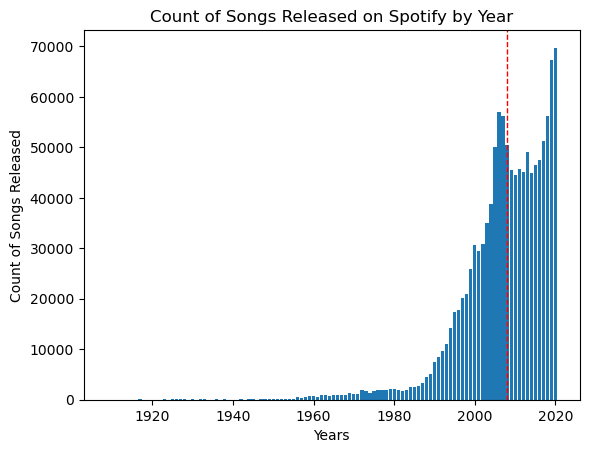

In [18]:
plt.bar(year_count.index, year_count.values)

plt.xlabel('Years')
plt.ylabel('Count of Songs Released')
plt.title('Count of Songs Released on Spotify by Year')

plt.axvline(x=2008, color='red', linestyle='--', linewidth=1)

plt.show()

Next I would like to know what the oldest and newest songs in the dataset are

In [19]:
print('Oldest: ',df['year'].min())
print('Newest: ',df['year'].max())

Oldest:  1909
Newest:  2020


Another thing I would like to know is the number of songs we have data on before and after 2008.

There are 540,129 songs released before 2008 and 663,853 songs released in and after 2008. This is quite a lot of data for both sides so I think this will be fairly representative of the music on spotify.

In [20]:
print('Pre-2008 Count: ',df['year'].loc[df['year'] < 2008].count())
print('2008 & After Count: ',df['year'].loc[df['year'] >= 2008].count())

Pre-2008 Count:  540129
2008 & After Count:  663853


### ANOVA Analysis

To do the analysis, I will split the data into two seperate dataframes. One dataframe will contain duration of songs released before 2008, and the second dataframe will include duration of songs from 2008 and after.

In [25]:
pre_2008 = df[['duration_ms','year']].loc[df['year'] < 2008]

df['year'].loc[df['year'] < 2008]## Data Summary and Implications



In [27]:
pre_2008.head()

,duration_ms,year
0,210133,1999
1,206200,1999
2,298893,1999
3,213640,1999
4,205600,1999


In [30]:
during_after_2008 = df[['duration_ms','year']].loc[df['year'] >= 2008]

In [31]:
during_after_2008.head()

,duration_ms,year
22,224307,2018
23,238000,2018
24,268013,2018
25,277813,2018
26,209960,2018


In [35]:
print("ANOVA Results: " , "\n", stats.f_oneway(pre_2008['duration_ms'],during_after_2008['duration_ms']), "\n")

ANOVA Results:  
 F_onewayResult(statistic=1.9157774994603458, pvalue=0.16632315098948963) 



From this ANOVA analysis, we can determine that the two means of pre-2008 and during/post-2008 are not the same.

Averages:  249064.81797311382 248653.40735072372


<BarContainer object of 2 artists>

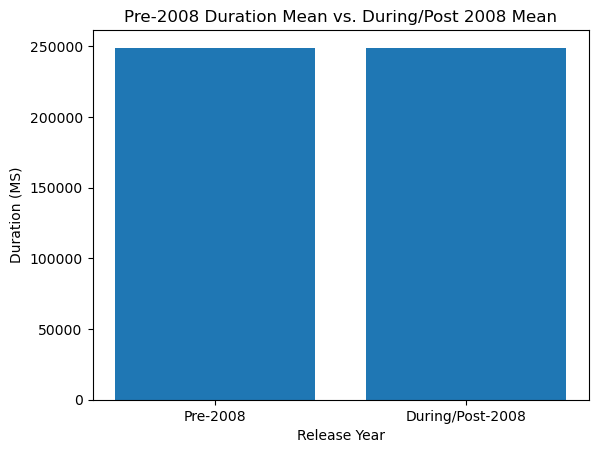

In [40]:
#get mean values
mean_value1 = pre_2008['duration_ms'].mean()
mean_value2 = during_after_2008['duration_ms'].mean()
print('Averages: ',mean_value1, mean_value2)

labels = ['Pre-2008', 'During/Post-2008']
means = [mean_value1, mean_value2]

plt.title('Pre-2008 Duration Mean vs. During/Post 2008 Mean')
plt.xlabel('Release Year')
plt.ylabel('Duration (MS)')

plt.bar(labels, means)


I am curious to see if on the graph we can see a more significant change if we just focus on various times post-2008 since it was not as extreme a reduction as I personally expected.

Averages:  249064.81797311382 248653.40735072372 240693.216293713 222865.38444769525


<BarContainer object of 4 artists>

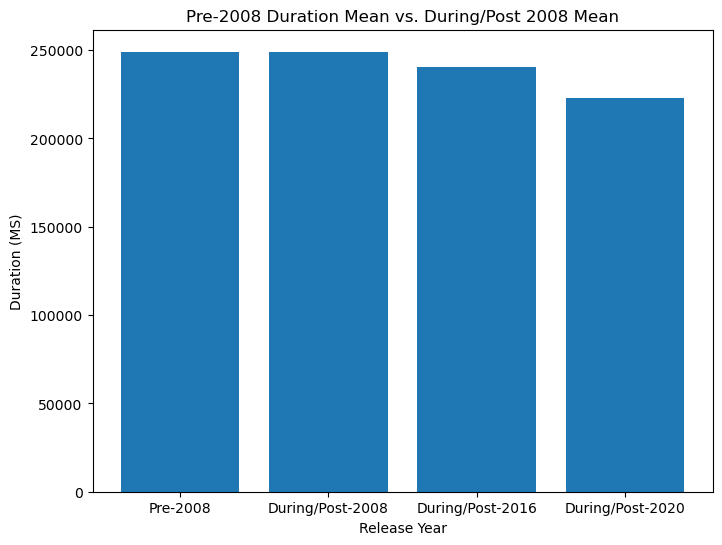

In [47]:
during_after_2016 = df[['duration_ms','year']].loc[df['year'] >= 2016]
during_after_2020 = df[['duration_ms','year']].loc[df['year'] >= 2020]


#get mean values
mean_value1 = pre_2008['duration_ms'].mean()
mean_value2 = during_after_2008['duration_ms'].mean()
mean_value3 = during_after_2016['duration_ms'].mean()
mean_value4 = during_after_2020['duration_ms'].mean()

print('Averages: ',mean_value1, mean_value2, mean_value3, mean_value4 )

labels = ['Pre-2008', 'During/Post-2008', 'During/Post-2016', 'During/Post-2020']
means = [mean_value1, mean_value2, mean_value3, mean_value4]

plt.figure(figsize=(8, 6))

plt.title('Pre-2008 Duration Mean vs. During/Post 2008 Mean')
plt.xlabel('Release Year')
plt.ylabel('Duration (MS)')

plt.bar(labels, means)


> E.  Summarize the implications of your data analysis by discussing the results of your data analysis in the context of the research question, including one limitation of your analysis. Within the context of your research question, recommend a course of action based on your results. Then propose two directions or approaches for future study of the data set.



The implications of my data analysis are that there was a statistically significant change in the duration of music before 2008 and during/post-2008. We know this since the ANOVA analysis returns that our p-value is .166, which means we have to reject our null-hypothesis that the two means of the dataset are the same, which would imply that the average duration of songs would have changed. 

The implication of this analysis is that music is being reduced by a statistically significant amount as time goes on. We can see that in the graph if we focus on smaller time points past 2008 that the mean appears to be reduced even more. This data is not enough to attribute the causation to Spotify's release. In terms of reccomended course of action, as a musician, one can justify a reduced length in songs length as it appears that the trend is to continue to reduce the average length of songs as time goes on. If one would want to break the trend, creating a longer song would be different then what most people are moving towards.

> F.  Acknowledge sources, using in-text citations and references, for content that is quoted.



https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html